<a href="https://colab.research.google.com/github/Arnav1511/OMSA/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggle_dataset'

In [3]:
%cd /content/gdrive/MyDrive/kaggle_dataset

/content/gdrive/MyDrive/kaggle_dataset


In [4]:
!ls


'Bigtech - 12-07-2020 till 19-09-2020'
'Bigtech - 20-09-2020 till 13-10-2020.csv'
 big-tech-companies-tweet-sentiment.zip
 kaggle.json


In [5]:
!pwd


/content/gdrive/MyDrive/kaggle_dataset


In [6]:
!kaggle datasets download -d wjia26/big-tech-companies-tweet-sentiment

big-tech-companies-tweet-sentiment.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!ls

'Bigtech - 12-07-2020 till 19-09-2020'
'Bigtech - 20-09-2020 till 13-10-2020.csv'
 big-tech-companies-tweet-sentiment.zip
 kaggle.json


In [8]:
!unzip /content/gdrive/MyDrive/kaggle_dataset/big-tech-companies-tweet-sentiment.zip

Archive:  /content/gdrive/MyDrive/kaggle_dataset/big-tech-companies-tweet-sentiment.zip
replace Bigtech - 12-07-2020 till 19-09-2020/Bigtech - 12-07-2020 till 19-09-2020.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
!ls


'Bigtech - 12-07-2020 till 19-09-2020'
'Bigtech - 20-09-2020 till 13-10-2020.csv'
 big-tech-companies-tweet-sentiment.zip
 kaggle.json


In [10]:
%cd Bigtech - 12-07-2020 till 19-09-2020

/content/gdrive/My Drive/kaggle_dataset/Bigtech - 12-07-2020 till 19-09-2020


In [11]:
%cd ..

/content/gdrive/My Drive/kaggle_dataset


In [12]:
!ls

'Bigtech - 12-07-2020 till 19-09-2020'
'Bigtech - 20-09-2020 till 13-10-2020.csv'
 big-tech-companies-tweet-sentiment.zip
 kaggle.json


In [13]:
import pandas as pd
df=pd.read_csv("Bigtech - 20-09-2020 till 13-10-2020.csv")


In [14]:
df.shape

(266095, 15)

In [15]:
df.columns

Index(['created_at', 'file_name', 'followers', 'friends', 'group_name',
       'location', 'retweet_count', 'screenname', 'search_query', 'text',
       'twitter_id', 'username', 'polarity', 'partition_0', 'partition_1'],
      dtype='object')

In [16]:
df.head()

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1
0,2020-10-05 08:44:25,Nvidia,41,410,Nvidia,sydney,0,jyolyu,#Nvidia,#NVIDIA #GauGAN is actually a good tool to pra...,1313037313635565568,N0%Ice,0.4404,Technology,Nvidia
1,2020-10-05 08:44:03,Nvidia,367,267,Nvidia,PARIS,0,MiClaverie,#Nvidia,"#BullSequana X2415, the first #supercomputer b...",1313037222422118400,Michèle Claverie,0.0000,Technology,Nvidia
2,2020-10-05 08:41:35,Nvidia,14,104,Nvidia,Japan,0,_stingraze,#Nvidia,I'm going to attend GTC 2020 tonight! Excited....,1313036602675916802,Tsubasa Kato,0.4003,Technology,Nvidia
3,2020-10-05 08:28:11,Nvidia,18286,941,Nvidia,NaN,0,gamingonlinux,#Nvidia,#NVIDIA delays launch of #GeForce RTX 3070 unt...,1313033229201477634,GamingOnLinux 🐧,0.0000,Technology,Nvidia
4,2020-10-05 08:18:05,Nvidia,42,84,Nvidia,"Paris, France",0,anupdshetty,#Nvidia,"#BullSequana X2415, the first #supercomputer b...",1313030688338317312,Anup Shetty,0.0000,Technology,Nvidia


In [17]:
tweet=df.text.values
print(tweet)

['#NVIDIA #GauGAN is actually a good tool to practice composition/framing? https://t.co/CJyec1kNU1'
 '#BullSequana X2415, the first #supercomputer blade server in Europe to integrate #NVIDIA’s Ampere next-generation graphics processing unit architecture, the NVIDIA A100 Tensor Core #GPU s.  Read more ▶ https://t.co/5HXnY4IoJ5 Atos is sponsor at #Nvidia #GTC20 Digital https://t.co/KSd2CmfsUH'
 "I'm going to attend GTC 2020 tonight! Excited. #Nvidia #GTC20" ...
 'NEW VIDEO!!   FRIEND v FRIEND CHALLENGE!!   https://t.co/dOrH0MRRNi   #friendvfriend #friends #challenge #challenger #youtube #YouTuber #twitch #TwitchStreamers'
 '‼️NEW VIDEO‼️ Films inspired by Jodorowskys Dune  REACTION 💥  YouTube: Those 2! REACTION  * HERE’S OUR VIDEO: https://t.co/f0wKQQ2Wpe * #youtube #those2 #those2reacts #reaction #subscribe #supportblackcreators #contentcreators #share #couple #dune #filmsinspiredbydune https://t.co/ismHqfBjtr'
 '‼️NEW VIDEO‼️ Films inspired by Jodorowskys Dune  REACTION 💥  YouTube: Tho

In [18]:
import nltk 
from nltk.tokenize import RegexpTokenizer #to remove punctuations and tokenize the text
from nltk.corpus import stopwords # to remove the stop words after tokenization
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
import re

for text in tweet:
    text = re.sub(r'http\S+', '', text)

In [42]:
stop_words=set(stopwords.words('english')) #get all stop words

tokenizer = RegexpTokenizer(r"\w+")
lst=tokenizer.tokenize(text)

filtered=[w for w in lst if not w.lower() in stop_words] #if word is in stopwords
print(filtered)

['NEW', 'VIDEO', 'Films', 'inspired', 'Jodorowskys', 'Dune', 'REACTION', 'YouTube', '2', 'REACTION', 'VIDEO', 'youtube', 'those2', 'those2reacts', 'reaction', 'subscribe', 'supportblackcreators', 'contentcreators', 'share', 'couple', 'dune', 'filmsinspiredbydune']


In [43]:
def cleanText(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #remove mentions
    text=re.sub(r'#','',text) #remove hashtags
    return text

sort=cleanText(text)

print(sort)

‼️NEW VIDEO‼️ Films inspired by Jodorowskys Dune  REACTION 💥  YouTube: Those 2! REACTION  * HERE’S OUR VIDEO:  * youtube those2 those2reacts reaction subscribe supportblackcreators contentcreators share couple dune filmsinspiredbydune 


In [44]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getFilteredText(text):
    text= cleanText(text);
    return text

print(text)

df['Subjectivity']=df['text'].apply(getSubjectivity)
df['NewPolarity']=df['text'].apply(getPolarity)
df['CleanedText']=df['text'].apply(getFilteredText)

‼️NEW VIDEO‼️ Films inspired by Jodorowskys Dune  REACTION 💥  YouTube: Those 2! REACTION  * HERE’S OUR VIDEO:  * #youtube #those2 #those2reacts #reaction #subscribe #supportblackcreators #contentcreators #share #couple #dune #filmsinspiredbydune 


In [46]:
df[['file_name', 'text','CleanedText', 'Subjectivity', 'NewPolarity']].head(50)


,file_name,text,CleanedText,Subjectivity,NewPolarity
0,Nvidia,#NVIDIA #GauGAN is actually a good tool to pra...,NVIDIA GauGAN is actually a good tool to pract...,0.600000,0.700000
1,Nvidia,"#BullSequana X2415, the first #supercomputer b...","BullSequana X2415, the first supercomputer bla...",0.277778,0.250000
2,Nvidia,I'm going to attend GTC 2020 tonight! Excited....,I'm going to attend GTC 2020 tonight! Excited....,0.750000,0.375000
3,Nvidia,#NVIDIA delays launch of #GeForce RTX 3070 unt...,NVIDIA delays launch of GeForce RTX 3070 until...,0.000000,0.000000
4,Nvidia,"#BullSequana X2415, the first #supercomputer b...","BullSequana X2415, the first supercomputer bla...",0.277778,0.250000
5,Nvidia,"#BullSequana X2415, the first #supercomputer b...","BullSequana X2415, the first supercomputer bla...",0.277778,0.250000
6,Nvidia,"Today, don’t miss the World’s largest #AI conf...","Today, don’t miss the World’s largest AI confe...",0.000000,0.000000
7,Nvidia,"#BullSequana X2415, the first #supercomputer b...","BullSequana X2415, the first supercomputer bla...",0.277778,0.250000
8,Nvidia,"#BullSequana X2415, the first #supercomputer b...","BullSequana X2415, the first supercomputer bla...",0.277778,0.250000
9,Nvidia,NVIDIA GeForce RTX 30 Series – Top Facts &amp;...,NVIDIA GeForce RTX 30 Series – Top Facts &amp;...,0.633333,0.033333


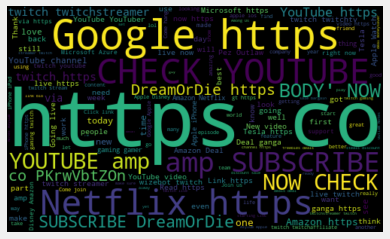

In [47]:
#Plot a word cloud 
from wordcloud import WordCloud
import tweepy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

allWords = ' '.join( [twts for twts in df['CleanedText']])
wordCloud = WordCloud( width = 500, height= 300, random_state = 21, max_font_size = 119).generate(allWords)

print(wordCloud)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [48]:
#Create a function to compute positive, negative or neutral text

def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'

df['Analysis']= df['NewPolarity'].apply(getAnalysis)


In [33]:
df[['file_name', 'text','CleanedText', 'Subjectivity', 'NewPolarity','Analysis']].head(50)


,file_name,text,CleanedText,Subjectivity,NewPolarity,Analysis
0,Nvidia,#NVIDIA #GauGAN is actually a good tool to pra...,NVIDIA GauGAN is actually a good tool to pract...,0.600000,0.700000,Positive
1,Nvidia,"#BullSequana X2415, the first #supercomputer b...","BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
2,Nvidia,I'm going to attend GTC 2020 tonight! Excited....,I'm going to attend GTC 2020 tonight! Excited....,0.750000,0.375000,Positive
3,Nvidia,#NVIDIA delays launch of #GeForce RTX 3070 unt...,NVIDIA delays launch of GeForce RTX 3070 until...,0.000000,0.000000,Neutral
4,Nvidia,"#BullSequana X2415, the first #supercomputer b...","BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
5,Nvidia,"#BullSequana X2415, the first #supercomputer b...","BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
6,Nvidia,"Today, don’t miss the World’s largest #AI conf...","Today, don’t miss the World’s largest AI confe...",0.000000,0.000000,Neutral
7,Nvidia,"#BullSequana X2415, the first #supercomputer b...","BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
8,Nvidia,"#BullSequana X2415, the first #supercomputer b...","BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
9,Nvidia,NVIDIA GeForce RTX 30 Series – Top Facts &amp;...,NVIDIA GeForce RTX 30 Series – Top Facts &amp;...,0.633333,0.033333,Positive


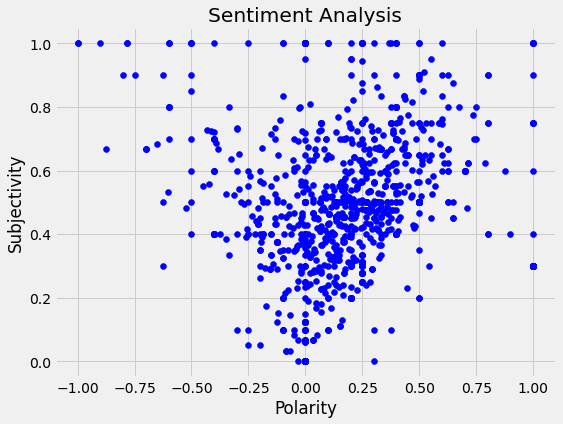

In [64]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, 1500):
  plt.scatter(df['NewPolarity'][i], df['Subjectivity'][i], color='Blue')

  plt.title('Sentiment Analysis')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
plt.show()

In [66]:
#Get the percentage of Positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['CleanedText']



round(  (ptweets.shape[0] / df.shape[0]) *100, 1)

51.4

In [67]:
#Get the percentage of Negative tweets
ntweets=df[df.Analysis == 'Negative']
ntweets = ntweets['CleanedText']
round(  (ntweets.shape[0] / df.shape[0]) *100, 1)

12.4

In [69]:
#Get the percentage of Neutral tweets
netweets=df[df.Analysis == 'Neutral']
netweets = netweets['CleanedText']
round(  (netweets.shape[0] / df.shape[0]) *100, 1)

36.2

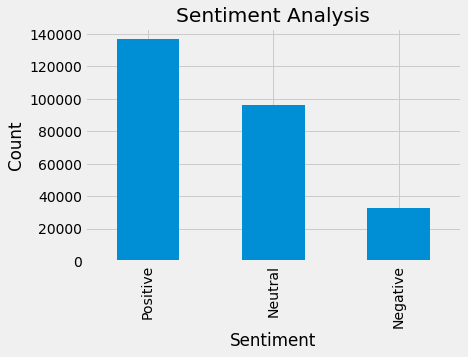

In [70]:
#Show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')


plt.show()
